# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy #install tomotopy
!pip install little_mallet_wrapper #install little_mallet_wrapper

import tomotopy as tp #import tomotopy
import little_mallet_wrapper #import little_mallet_wrapped
import seaborn #import seaborn
import glob #import glob
from pathlib import Path #import path
import pandas as pd #import pandas
import re #import re

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
#load the two datasets
sanders_tweets = pd.read_csv('sanders_tweets.csv')
trump_tweets = pd.read_csv('trump_tweets.csv')

# combine the two datasets
tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

#display sample rows
tweets.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [24]:
# Q3 (code)

training_data = [] #create an empty list training_data
original_texts = [] #create an empty list original_texts
titles = [] #create an empty list titles

# part of the loop code is from chatgpt, part is from the previous course materials
# loop the code in every row
for index, row in tweets.iterrows():
    text = str(row['Content'])
    # transform tweets to lowercase, remove stopwords, punctuation and numbers
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    # As the urls impact the result a lot, need to remove URLs, user mentions, and specific unwanted patterns
    # this code is from chatgpt
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    # add the processed text to the list training_data
    training_data.append(processed_text)
    # add the text to the original text list
    original_texts.append(text)
     # add the author and the ID to the list titles
    titles.append(row['Title'])


#print the length of data to check
len(training_data), len(original_texts), len(titles)

(15498, 15498, 15498)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [25]:
# Q4 (code)

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.394804049003914
Iteration: 10	Log-likelihood: -9.009623074055899
Iteration: 20	Log-likelihood: -8.85531729030382
Iteration: 30	Log-likelihood: -8.765966384053094
Iteration: 40	Log-likelihood: -8.707005391595803
Iteration: 50	Log-likelihood: -8.663734652649467
Iteration: 60	Log-likelihood: -8.623984364333825
Iteration: 70	Log-likelihood: -8.59409619366749
Iteration: 80	Log-likelihood: -8.572320510658008
Iteration: 90	Log-likelihood: -8.554806867991815


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [26]:
# Q5a (code)
# Print out top 10 words for each topic

# print title
print("\nTopic Model Results:\n\n")

# create a list of the topics
topics = []
# create a list of words every topic
topic_individual_words = []
# loop in topics to add words in to word list
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
# print every topic and its words
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

united states trump people president must court vote democracy right

✨Topic 1✨

change climate energy fossil jobs planet unemployment trump system new

✨Topic 2✨

war wall street trump end saudi yemen senate big today

✨Topic 3✨

health care people right medicare republicans americans security social must

✨Topic 4✨

trade many china jobs states great united back years big

✨Topic 5✨

trump collusion fbi russia campaign mueller hunt witch hillary clinton

✨Topic 6✨

people must drug country americans need american america congress world

✨Topic 7✨

puerto rico must trump people would national american stand access

✨Topic 8✨

news fake media people never great even good time much

✨Topic 9✨

trump president sanders live since administration first watch join record

✨Topic 10✨

great thank state vote job military big first strong florida

✨Topic 11✨

day women today country america justice people stand american every

✨Topic 12✨

tax workers billion p

Q5b (words)

Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic Model Results:


✨Topic 0✨

united states trump people president must court vote democracy right

This topic is about the USA political issues, as democracy and the right are mentioned. The president and the vote refer to the vote of the government. Court refers to the law issues. Must may suggest the tough policy.

✨Topic 1✨

change climate energy fossil jobs planet unemployment trump system new

This topic refers to the evironment issues as energy, fossile and climate change are mentioned. The jobs and unemployment may show the negative impact caused by environment issues.

✨Topic 2✨

war wall street trump end saudi yemen senate big today

This topic is about the Trump's attitude or policies towards the yemen war. This suggests the concern on the international human right issues from USA.

✨Topic 3✨

health care people right medicare republicans americans security social must

This topic suggests social healthy and medicare system in USA. Must shows there maybe a strong emotion or attitude within the topic.

✨Topic 4✨

trade many china jobs states great united back years big

This topic is about the international trade state between China and USA. Many, big, great refers to a positive attitude. Jobs shows it refers to the job opportunities brought from the trade state.


✨Topic 5✨

trump collusion fbi russia campaign mueller hunt witch hillary clinton

This topic is about the investigation into alleged collusion between Donald Trump's 2016 presidential campaign and Russia, which was primarily conducted by Special Counsel Robert Mueller.


✨Topic 6✨

people must drug country americans need american america congress world

This topic is about the american people and their drug issues. Congress shows the government is concerned about the issue. Need shows the issue is expected to be solved.

✨Topic 7✨

puerto rico must trump people would national american stand access

This topic is about the Hurricane Maria in Puerto Rico and President Trump's attitude on it. Must suggests a tough situation it caused and trouble to be solved. National shows it is a heavy disaster.


✨Topic 8✨

news fake media people never great even good time much

The topic refers to the fake news on media. Much and never shows its a significat phenomena. Good or great shows positive attitude on it, which deserves to be investigated.

✨Topic 9✨

trump president sanders live since administration first watch join record

This topic is about Trump and Sander. It is about the live and record of them.

✨Topic 10✨

great thank state vote job military big first strong florida bo

This is about the Florida, refering to some political issues, like vote or military. Big, strong,great show the strength of the events or issue. Thank suggests a positive emotional value.

✨Topic 11✨

day women today country america justice people stand american every

This topic is about the current femenist justice in USA. day , today, every day shows this is related closely to the current american's life.

✨Topic 12✨

tax workers billion pay wage million year class corporations working

This is about the worker class and their tax issues. It is related to the ecomonic situations. Billion and million shows this is a significant issue.

✨Topic 13✨

border democrats wall country security want immigration republicans must get

THis is about the immigration issues in the USA. Wall of the countries and security suggests the boarderline of the countries is probably to be blocked. Must may suggest a tough policy.

✨Topic 14✨

great today whitehouse president thank honor forward house free white

This refers to the president and the whitehouse. Great, honor, thank show the positive emotional value. So it may be about the celebration of the president iauguration。

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [28]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

# print results
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5655719671895106 
Per Topic: [0.44475172758102416, 0.6040919605642557, 0.48915781900286676, 0.6458914428949356, 0.5444373100996017, 0.7964076101779938, 0.5484897345304489, 0.4677458554506302, 0.5472859136760235, 0.43834923058748243, 0.6058647900819778, 0.5111197978258133, 0.7089637160301209, 0.5574364185333252, 0.57358618080616]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

### Q6 (words)
#### initially:
Number of topics to return
num_topics = 15
Numer of topic words to print out
num_topic_words = 10
==== Coherence : c_v ====
Average: 0.5655719671895106
Per Topic: [0.44475172758102416, 0.6040919605642557, 0.48915781900286676, 0.6458914428949356, 0.5444373100996017, 0.7964076101779938, 0.5484897345304489, 0.4677458554506302, 0.5472859136760235, 0.43834923058748243, 0.6058647900819778, 0.5111197978258133, 0.7089637160301209, 0.5574364185333252, 0.57358618080616]


The average coherence score is 0.5655719671895106. This score is moderate, suggesting that the model has managed to capture meaningful topics to a certain extent. But it still could be advanced.
Topic 6 scored 0.7964076101779938, indicating a high degree of coherence. This score suggests that the words within this topic are closely related, making it a strongly coherent topic.
Topic 9 score is 0.43834923058748243, indicating weaker relatedness among the topic's words, which might suggest that the topic is less coherent, possibly covering more diverse or unrelated concepts.

#### changes:


15 : 0.5655719671895106

20 : 0.5921958226989955

30 : 0.6053002022330959

40 : 0.6285927747376265  

50 : 0.6316116304844619  

60 : 0.6263634580870471   

70 : 0.6590297823931492  

80 : 0.6927529632300138  

90 : 0.6640781739354136   

100: 0.6939850674569606  
  

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

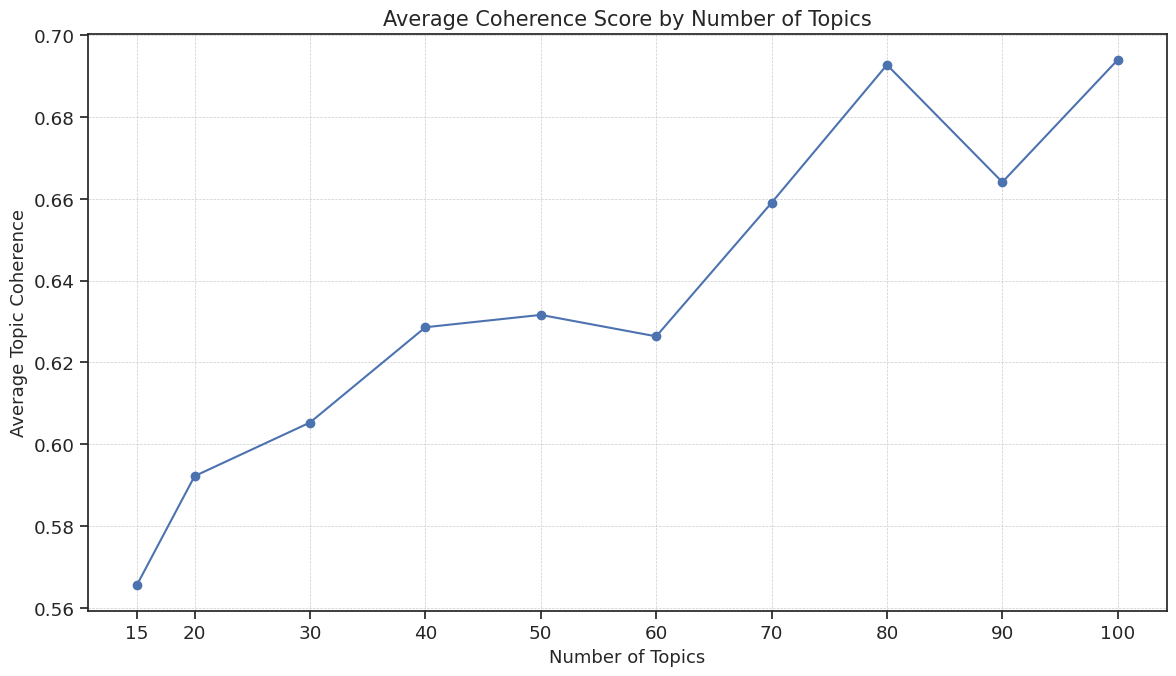

In [30]:
# X1 (code)

# Tip: y = average topic coherence; x = number of topics in the model

#import package to show plot
import matplotlib.pyplot as plt

#define the function to show polt. this code is helped by chatgpt
def plot_average_coherence(num_topics_list, average_coherence_scores):
    """
    Plot the average coherence scores for LDA models with different numbers of topics.

    Parameters:
    - num_topics_list: A list of the number of topics tested in each model.
    - average_coherence_scores: A list of average coherence scores corresponding to each number of topics.

    The function plots the number of topics on the x-axis and the average coherence score on the y-axis.
    """
    plt.figure(figsize=(12, 7))  # Set the figure size for better readability
    plt.plot(num_topics_list, average_coherence_scores, marker='o', linestyle='-', color='b')  # Plot the data
    plt.title('Average Coherence Score by Number of Topics', fontsize=15)  # Title of the plot
    plt.xlabel('Number of Topics', fontsize=13)  # Label for the x-axis
    plt.ylabel('Average Topic Coherence', fontsize=13)  # Label for the y-axis
    plt.xticks(num_topics_list)  # Ensure each number of topics is marked on the x-axis for clarity
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
    plt.show()  # Display the plot

# Updated example usage with numbers from the table
num_topics_list = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
average_coherence_scores = [
    0.5655719671895106, 0.5921958226989955, 0.6053002022330959, 0.6285927747376265,
    0.6316116304844619, 0.6263634580870471, 0.6590297823931492, 0.6927529632300138,
    0.6640781739354136, 0.6939850674569606
]

#display the plot
plot_average_coherence(num_topics_list, average_coherence_scores)



### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [34]:
# Q7a (code)

# get the topic distrbutionlist
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

#import packages to display the documents
from IPython.display import Markdown, display
# import the regular expressions library re, which will allow us to find and replace the correct words
import re

#define functions
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return



# Display 5 documents for topic 0
get_top_docs(original_texts, topic_distributions, topic_index=6, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=8, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=12, n=5)

### ✨Topic 6✨

people must drug country americans need american america congress world



---


✨  
**Topic Probability**: 0.9079325199127197  
**Document**: Trump has told the American **people** several hundred times that Mexico would pay for the wall. That is a lie. If his wall were to be built, Mexico would not pay for it. American taxpayers would.



✨  
**Topic Probability**: 0.9020828008651733  
**Document**: 85,000 children have starved to death during the Saudi-led intervention in Yemen.

The U.S. should not be part of Saudi Arabia's destructive foreign policy. Congress **must** end our participation in that war now, and help provide immediate humanitarian aid there to save lives.



✨  
**Topic Probability**: 0.8937228918075562  
**Document**: Trump’s withdrawal from the INF treaty is dangerous and irresponsible. We should strengthen these treaties, not end them. We should invest in our children, our seniors and our working families, not in an incredibly expensive arms race.



✨  
**Topic Probability**: 0.8897790908813477  
**Document**: A student who studies hard gets hit with insurmountable debt, yet bankers who crashed our economy got a bailout and bonuses.



✨  
**Topic Probability**: 0.8897790908813477  
**Document**: A Green New Deal isn't just about the climate—it is about preventing hunger and illness. The time for incremental change has passed. We **must** fight to rapidly transform our energy system. https://t.co/EiflnYD8Vz



### ✨Topic 8✨

news fake media people never great even good time much



---


✨  
**Topic Probability**: 0.940586268901825  
**Document**:  Many @harleydavidson owners plan to boycott the company if manufacturing moves overseas. Great! Most other companies are coming in our direction, including Harley competitors. A really bad move! U.S. will soon have a level playing field, or better.



✨  
**Topic Probability**: 0.9337088465690613  
**Document**:  RT @FLOTUS: I had a wonderful visit to @WRBethesda today.  Thank you to the many dedicated service members &amp; medical staff who take such **good** care of our men &amp; women in uniform. https://t.co/iPjxyRhY4H



✨  
**Topic Probability**: 0.909146249294281  
**Document**:  Not only did Congressman Ron DeSantis easily win the Republican Primary, but his opponent in November is his biggest dream....a failed Socialist Mayor named Andrew Gillum who has allowed crime &amp; many other problems to flourish in his city. This is not what Florida wants or needs!



✨  
**Topic Probability**: 0.9060043692588806  
**Document**:  ......MAKE FRANCE GREAT AGAIN!



✨  
**Topic Probability**: 0.9041093587875366  
**Document**:  Kimberley Strassel should get the Pulitzer. She is a treasure (and I don’t know her) who correctly called the Russia Hoax right from the start! Others who were soooo wrong will get the Prize. Fake News! https://t.co/TJJPY5MM6X



### ✨Topic 12✨

tax workers billion pay wage million year class corporations working



---


✨  
**Topic Probability**: 0.9458540678024292  
**Document**: Wealth increase in past 10 months:
⬆️$173 **billion**: Elon Musk
⬆️$77 **billion**: Jeff Bezos
⬆️$60 billion: Walton family
⬆️$43 billion: Bill Gates
⬆️$39 billion: Mark Zuckerberg

12-**year** increase in U.S. minimum **wage**: $0

We must **tax** the rich &amp; raise the minimum **wage** to at least $15.



✨  
**Topic Probability**: 0.9380958676338196  
**Document**: Trump said he wanted to get America out of wars. He lied.

When we passed a bipartisan bill to end illegal support for Saudi airstrikes in Yemen, he vetoed it.

Trump ignored the Constitution to keep helping this brutal dictatorship as it bombs civilians. https://t.co/RPMINmhO3F



✨  
**Topic Probability**: 0.9333187341690063  
**Document**: Federal Minimum Wage in 2009: $7.25/hr
Federal Minimum Wage in 2020: $7.25/hr

Total Wealth of U.S. Billionaires in 2009: $1.27 trillion
Total Wealth of U.S. Billionaires in 2020: $3.63 trillion

Our job: Tax the rich and increase the minimum **wage** to at least $15 an hour.



✨  
**Topic Probability**: 0.9306426048278809  
**Document**: Wealth and income inequality is now so extreme that the top 1% is literally taking $2.5 trillion away from the bottom 90% each and every **year**. It's time to end trickle-down economics, raise the minimum **wage** to $15 an hour and create an economy that works for all, not just the 1%.



✨  
**Topic Probability**: 0.9306426048278809  
**Document**: I cannot understand this way of thinking from White House advisor Jared Kushner. It is not moral to have benefitted from the safe haven America provided our parents and grandparents fleeing violence, only to then slam the door shut on today's refugees. https://t.co/ve5tA6rhjr



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Are there topics that have top tweets only by one politician?   
Yes, topic 6 and 12 are more representing Sanders' views.
Toppic 8 more is representative for Trump's views.

Why do you think these topics are more representative of one of the two politicians' views?  
The criticism of Trump’s foreign intervention, student debt and environmental policies in topic6, and economic inequality, wealth taxes and the minimum wage issues in topic 12 are Sander's views.
National manufacturing, media criticism, and political support in topic 8 are Trump’s rhetoric and actions.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [36]:
# Create a sample of tweets
# import module
from random import sample
# create sample
target_labels = sample(titles,100)

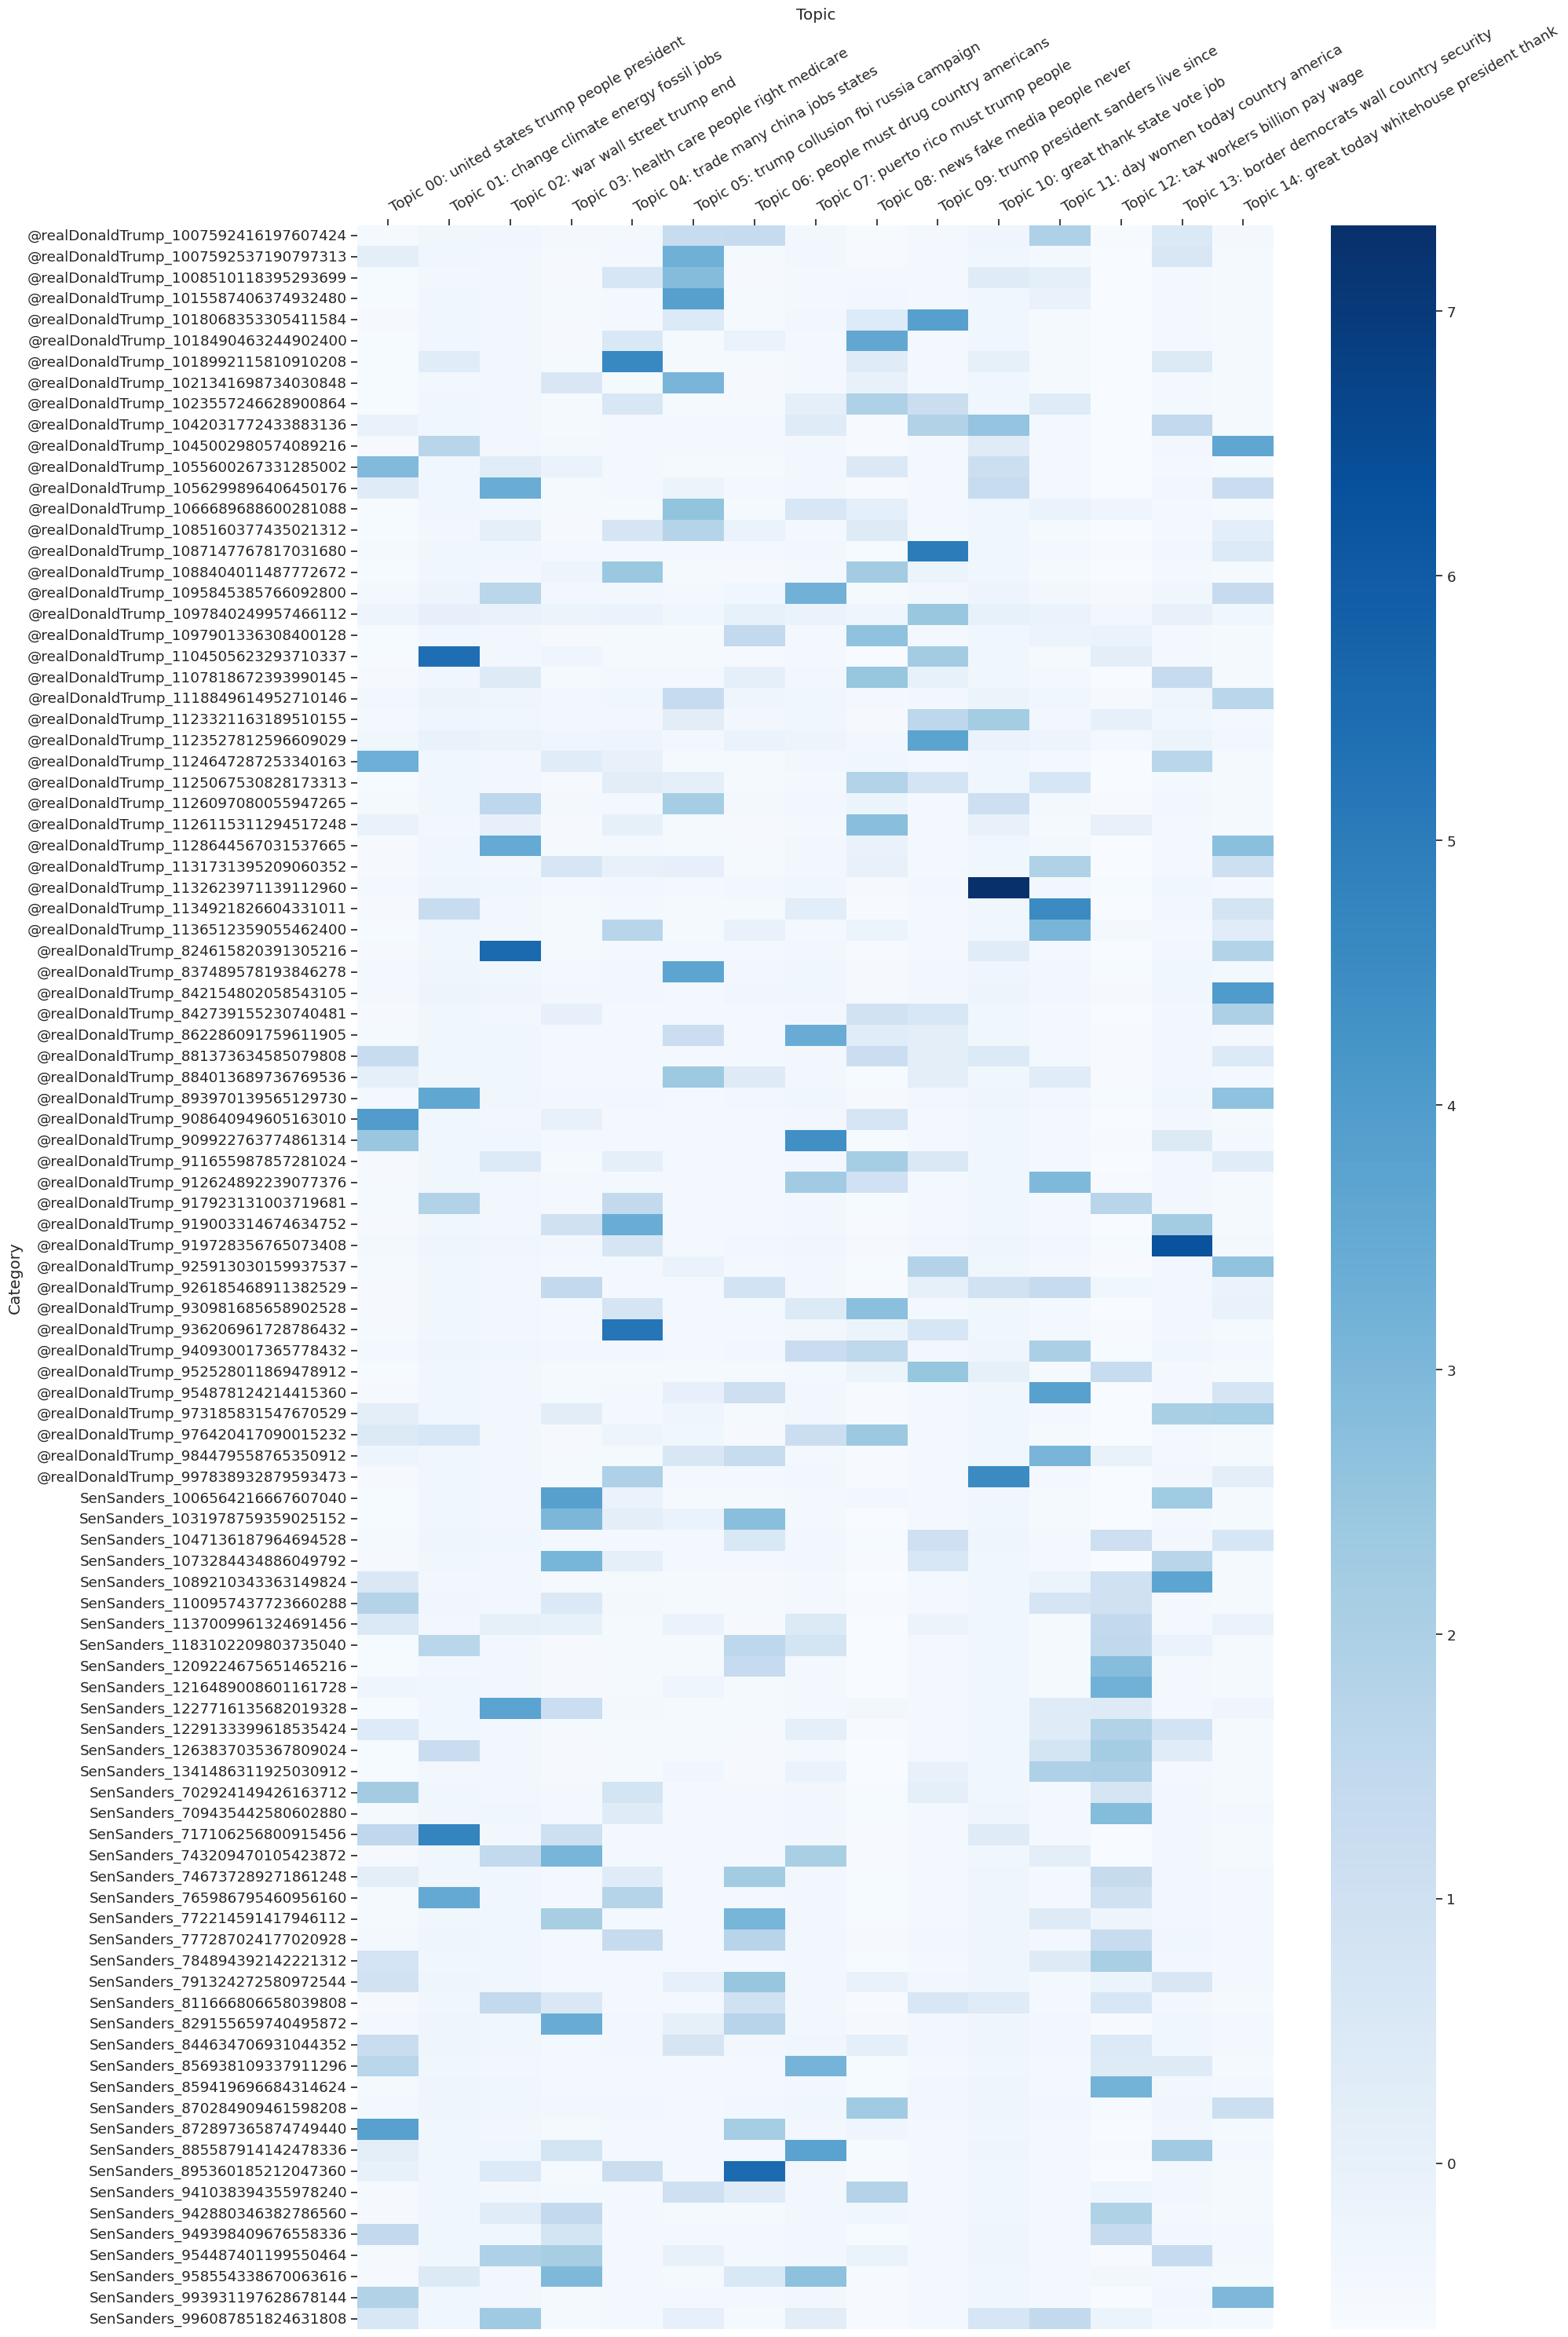

In [37]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

# import modules for display plot and
import matplotlib.pyplot as plt
import seaborn as sns
# define funtion to create heatmap
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# display the plot
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(20,30))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
The darker squares in this heatmap represent a high probability for the corresponding topic, and the lighter squares in the heatmap represent a low probability for the corresponding topic.  

The topics that Trump mentions more frequently about political issues between countries. This relates to nationalist and sovereignty-first viewpoints common in right-wing politics. This could involve a hardline stance on foreign policy, a focus on national security, and confrontations with other countries, especially regarding trade and border security. Topics more likely about Trump are also the celebration of electoral victories. This reflects Trump's emphasis on electoral success during his presidency. It may also connect to nationalist sentiments and personal achievement celebrated during elections.


Topic 3 and 6 are more likely for Sanders. They are about public health care. It aligns with core left-wing political issues that focus on social equity and public welfare. Support for universal healthcare access, funding public welfare programs through higher taxes, and other policies that expand the government's role in social safety nets are what left-wing concerns about.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

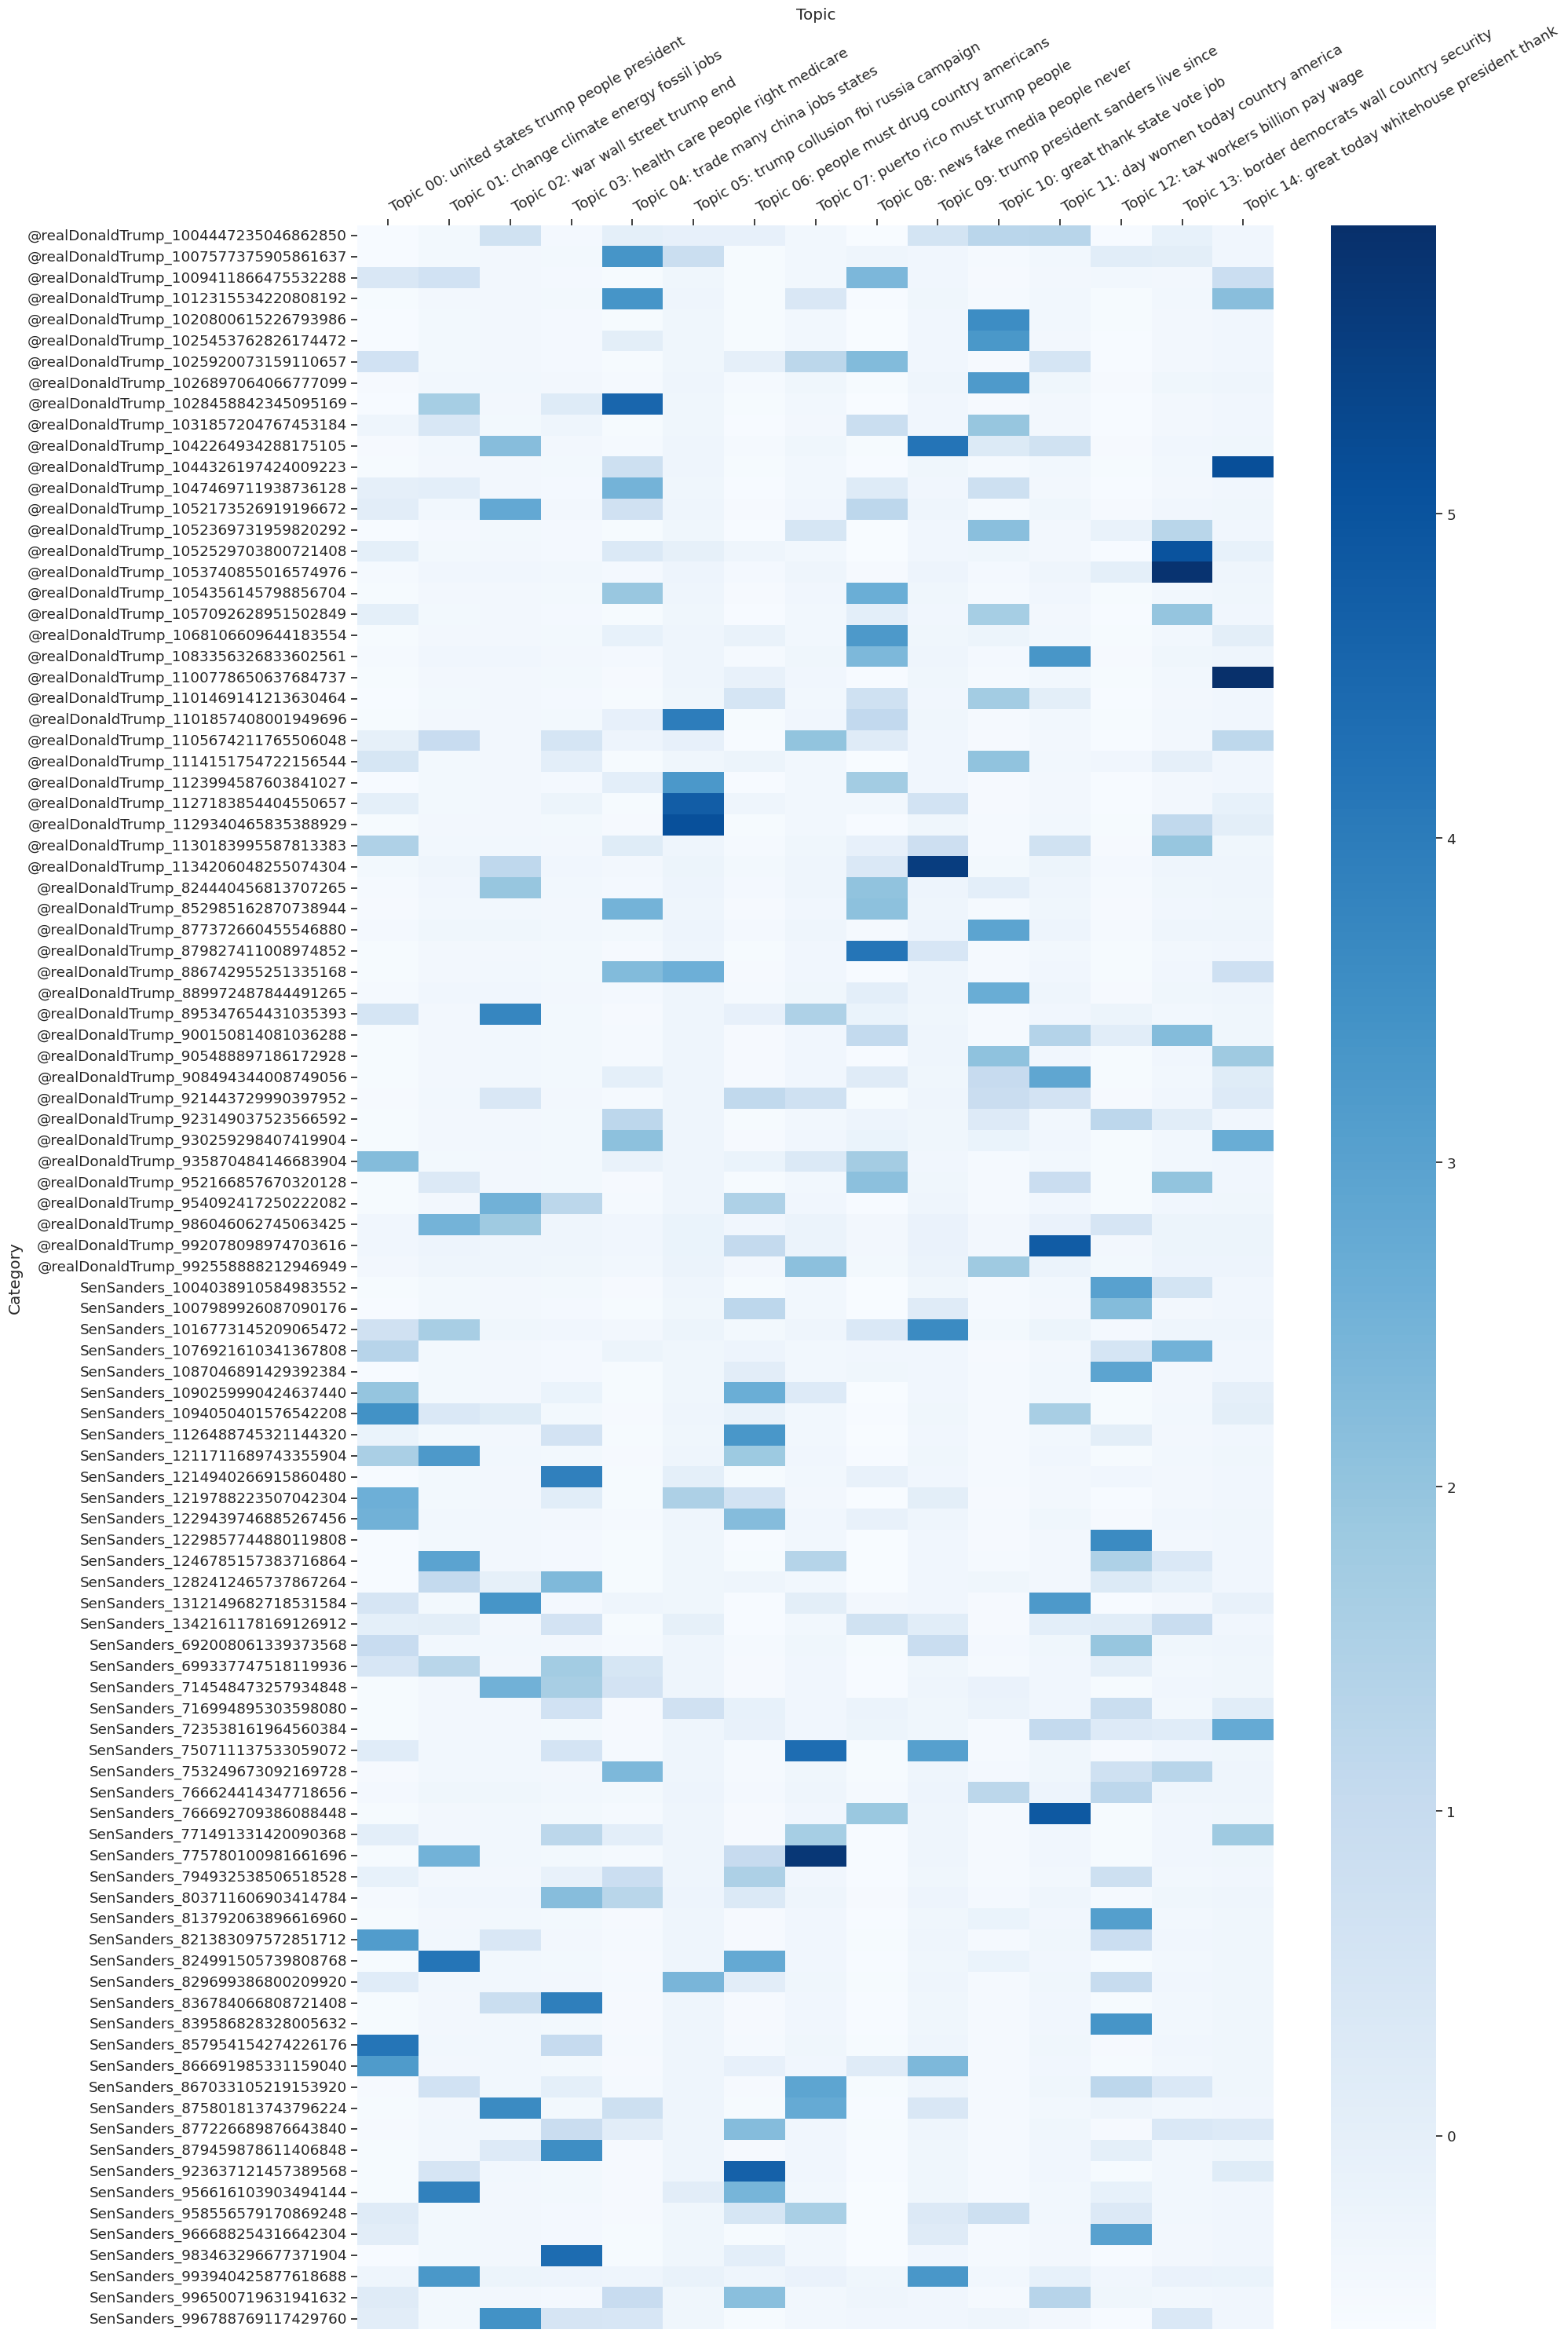

In [38]:
# X2 (code)
# the code is helped by chatgpt
# Filter titles for each politician
trump_titles = [title for title in titles if 'Trump' in title]
sanders_titles = [title for title in titles if 'SenSanders' in title]

# Sample 50 titles for each politician
trump_sample = sample(trump_titles, 50)
sanders_sample = sample(sanders_titles, 50)

# Combine the two samples to create a balanced list of 100 titles
balanced_sample = trump_sample + sanders_sample

# Shuffle the combined list to randomize the order

target_labels = sample(balanced_sample, len(balanced_sample))

# Now random_balanced_sample contains a balanced, randomized sample of 100 tweets

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(20,30))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [40]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

# import pandas module to process dara
import pandas as pd
# create list of topic results
topic_results = []
# create the loop to add topics into it
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})
# creates the dataframe
df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')
# display the dataframe
df

,document,Topic 0 united states trump people,Topic 1 change climate energy fossil,Topic 2 war wall street trump,Topic 3 health care people right,Topic 4 trade many china jobs,Topic 5 trump collusion fbi russia,Topic 6 people must drug country,Topic 7 puerto rico must trump,Topic 8 news fake media people,Topic 9 trump president sanders live,Topic 10 great thank state vote,Topic 11 day women today country,Topic 12 tax workers billion pay,Topic 13 border democrats wall country,Topic 14 great today whitehouse president
0,SenSanders_1351670845639421952,0.004621,0.002698,0.002486,0.004863,0.004330,0.003584,0.005090,0.002423,0.006228,0.002939,0.003556,0.004021,0.945854,0.003876,0.003432
1,SenSanders_1351259762722279424,0.006166,0.003600,0.003318,0.131925,0.005779,0.004783,0.006793,0.086857,0.008311,0.003922,0.004745,0.005366,0.718685,0.005172,0.004580
2,SenSanders_1351242822293319680,0.009266,0.005410,0.004986,0.009752,0.008683,0.007187,0.073033,0.067685,0.012488,0.068719,0.007130,0.510675,0.011853,0.196252,0.006882
3,SenSanders_1350885541911400448,0.082860,0.003322,0.041647,0.005989,0.005333,0.197339,0.160608,0.002984,0.007670,0.003619,0.004379,0.352216,0.007279,0.120528,0.004226
4,SenSanders_1349880150041780224,0.004930,0.036304,0.002653,0.372874,0.004620,0.003824,0.005430,0.002585,0.006644,0.103413,0.037219,0.004289,0.273714,0.070987,0.070513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,@realDonaldTrump_1136601231906893824,0.029995,0.017512,0.016140,0.031569,0.028109,0.023266,0.236425,0.015728,0.040427,0.019076,0.023080,0.432866,0.038370,0.025159,0.022278
15489,@realDonaldTrump_1136673237470011399,0.012376,0.007225,0.510149,0.013025,0.011597,0.009600,0.013633,0.090404,0.016680,0.259616,0.009523,0.010769,0.015831,0.010381,0.009192
15490,@realDonaldTrump_1136688317276348416,0.010597,0.006187,0.005702,0.011153,0.009931,0.583064,0.011674,0.005557,0.301705,0.006740,0.008154,0.009221,0.013556,0.008889,0.007871
15491,@realDonaldTrump_1136693141019549701,0.016539,0.009656,0.008900,0.017408,0.127647,0.461419,0.018219,0.008673,0.246587,0.010519,0.012727,0.014392,0.021158,0.013873,0.012284
